In [1]:
# Supervised learning using a feedforward network

In [1]:
# Get and preprocess the data according to our requirement
import pandas as pd
data = pd.read_csv('insurance.csv')
print('\n #Features = '+str(data.shape[1]))
print('\n #Samples = '+str(data.shape[0]))
data.head()


 #Features = 2

 #Samples = 63


,Number of claims,Payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [18]:
# Following is the code for the training network.
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

torch.manual_seed(78)


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from torch.nn.functional import normalize

batch_size = 2

dat = data.to_numpy(dtype= np.float32) # dataframe  to numpy 
x = torch.from_numpy(dat[:,[0]])
x = torch.nn.functional.normalize(x, p=2.0, dim = 0)
y = torch.from_numpy(dat[:,[1]])
train_size = int(0.8*len(dat))
test_size = len(dat)- train_size
x_train, x_test = torch.utils.data.random_split(x, [train_size, test_size])
y_train, y_test = torch.utils.data.random_split(y, [train_size, test_size])

class CustomDataset_train(Dataset):
    def __init__(self):
        self.x_train = x_train
        self.y_train = y_train
        self.num_samples = len(x_train)
        
    def __getitem__(self, index):
        return self.x_train[index], self.y_train[index]

    def __len__(self):
        return self.num_samples

class CustomDataset_test(Dataset):

    def __init__(self):
        self.x_test = x_test
        self.y_test = y_test
        self.num_samples = len(x_test)

    def __getitem__(self, index):
        return self.x_test[index], self.y_test[index]

    def __len__(self):
        return self.num_samples

data_train = CustomDataset_train()
data_test = CustomDataset_test()
trainloader = DataLoader(dataset = data_train, batch_size=batch_size, shuffle=True)
testloader = DataLoader(dataset = data_test, batch_size=batch_size, shuffle=True)

In [19]:
import torch.nn as nn
input_size = x.shape[1]
output_size = y.shape[1]

# define network architecture
class myModel(nn.Module):
    def __init__(self,input_dim, output_dim, hidden_size1 =128, hidden_size2 = 128):
        super(myModel, self).__init__()
        #define network layers
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
      
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        
        out = self.fc3(out)
        return out
    
model = myModel(input_size, output_size)
print(model)

myModel(
  (fc1): Linear(in_features=1, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


In [25]:
#define loss function, optimizer and hyperparameters
loss = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
num_epochs = 1000
total_step = len(trainloader)

Epoch [1/1000], Step [3/25], Avg. Loss: 4414.3964
Epoch [1/1000], Step [6/25], Avg. Loss: 6433.1960
Epoch [1/1000], Step [9/25], Avg. Loss: 5317.0937
Epoch [1/1000], Step [12/25], Avg. Loss: 4556.4089
Epoch [1/1000], Step [15/25], Avg. Loss: 4647.6986
Epoch [1/1000], Step [18/25], Avg. Loss: 5161.6962
Epoch [1/1000], Step [21/25], Avg. Loss: 4669.9656
Epoch [1/1000], Step [24/25], Avg. Loss: 4440.8789
Epoch [2/1000], Step [3/25], Avg. Loss: 55198.6962
Epoch [2/1000], Step [6/25], Avg. Loss: 23491.9369
Epoch [2/1000], Step [9/25], Avg. Loss: 18650.5570
Epoch [2/1000], Step [12/25], Avg. Loss: 14193.4233
Epoch [2/1000], Step [15/25], Avg. Loss: 11746.2586
Epoch [2/1000], Step [18/25], Avg. Loss: 10159.8806
Epoch [2/1000], Step [21/25], Avg. Loss: 9993.0966
Epoch [2/1000], Step [24/25], Avg. Loss: 8912.0575
Epoch [3/1000], Step [3/25], Avg. Loss: 107337.8026
Epoch [3/1000], Step [6/25], Avg. Loss: 48038.7037
Epoch [3/1000], Step [9/25], Avg. Loss: 31788.7056
Epoch [3/1000], Step [12/25], 

Epoch [23/1000], Step [24/25], Avg. Loss: 102933.1520
Epoch [24/1000], Step [3/25], Avg. Loss: 1197828.1270
Epoch [24/1000], Step [6/25], Avg. Loss: 480541.7549
Epoch [24/1000], Step [9/25], Avg. Loss: 301390.4894
Epoch [24/1000], Step [12/25], Avg. Loss: 220042.7958
Epoch [24/1000], Step [15/25], Avg. Loss: 173120.0727
Epoch [24/1000], Step [18/25], Avg. Loss: 143292.2901
Epoch [24/1000], Step [21/25], Avg. Loss: 123162.6026
Epoch [24/1000], Step [24/25], Avg. Loss: 107456.5411
Epoch [25/1000], Step [3/25], Avg. Loss: 1241699.5819
Epoch [25/1000], Step [6/25], Avg. Loss: 499576.9290
Epoch [25/1000], Step [9/25], Avg. Loss: 312754.5548
Epoch [25/1000], Step [12/25], Avg. Loss: 231672.6286
Epoch [25/1000], Step [15/25], Avg. Loss: 182413.7508
Epoch [25/1000], Step [18/25], Avg. Loss: 150541.7491
Epoch [25/1000], Step [21/25], Avg. Loss: 128691.9754
Epoch [25/1000], Step [24/25], Avg. Loss: 112048.5993
Epoch [26/1000], Step [3/25], Avg. Loss: 1299068.0907
Epoch [26/1000], Step [6/25], Av

Epoch [46/1000], Step [12/25], Avg. Loss: 427834.6881
Epoch [46/1000], Step [15/25], Avg. Loss: 336673.6523
Epoch [46/1000], Step [18/25], Avg. Loss: 277639.5476
Epoch [46/1000], Step [21/25], Avg. Loss: 236189.6550
Epoch [46/1000], Step [24/25], Avg. Loss: 205710.0712
Epoch [47/1000], Step [3/25], Avg. Loss: 2380948.3472
Epoch [47/1000], Step [6/25], Avg. Loss: 953287.1490
Epoch [47/1000], Step [9/25], Avg. Loss: 597377.9381
Epoch [47/1000], Step [12/25], Avg. Loss: 436388.6663
Epoch [47/1000], Step [15/25], Avg. Loss: 345087.1490
Epoch [47/1000], Step [18/25], Avg. Loss: 284974.1894
Epoch [47/1000], Step [21/25], Avg. Loss: 242513.2397
Epoch [47/1000], Step [24/25], Avg. Loss: 211113.1375
Epoch [48/1000], Step [3/25], Avg. Loss: 2439377.1376
Epoch [48/1000], Step [6/25], Avg. Loss: 978199.3011
Epoch [48/1000], Step [9/25], Avg. Loss: 612164.7511
Epoch [48/1000], Step [12/25], Avg. Loss: 446020.8082
Epoch [48/1000], Step [15/25], Avg. Loss: 351321.7879
Epoch [48/1000], Step [18/25], A

Epoch [68/1000], Step [18/25], Avg. Loss: 410702.0350
Epoch [68/1000], Step [21/25], Avg. Loss: 349495.2881
Epoch [68/1000], Step [24/25], Avg. Loss: 305093.5488
Epoch [69/1000], Step [3/25], Avg. Loss: 3518167.1349
Epoch [69/1000], Step [6/25], Avg. Loss: 1412391.1386
Epoch [69/1000], Step [9/25], Avg. Loss: 883960.8882
Epoch [69/1000], Step [12/25], Avg. Loss: 643756.9521
Epoch [69/1000], Step [15/25], Avg. Loss: 507485.6428
Epoch [69/1000], Step [18/25], Avg. Loss: 418250.0772
Epoch [69/1000], Step [21/25], Avg. Loss: 355809.3797
Epoch [69/1000], Step [24/25], Avg. Loss: 309800.2320
Epoch [70/1000], Step [3/25], Avg. Loss: 3565825.3805
Epoch [70/1000], Step [6/25], Avg. Loss: 1428101.6941
Epoch [70/1000], Step [9/25], Avg. Loss: 895283.3765
Epoch [70/1000], Step [12/25], Avg. Loss: 654145.2337
Epoch [70/1000], Step [15/25], Avg. Loss: 514815.9404
Epoch [70/1000], Step [18/25], Avg. Loss: 424292.4265
Epoch [70/1000], Step [21/25], Avg. Loss: 361077.7867
Epoch [70/1000], Step [24/25],

Epoch [90/1000], Step [15/25], Avg. Loss: 661876.3082
Epoch [90/1000], Step [18/25], Avg. Loss: 545527.6384
Epoch [90/1000], Step [21/25], Avg. Loss: 464374.5579
Epoch [90/1000], Step [24/25], Avg. Loss: 404104.5314
Epoch [91/1000], Step [3/25], Avg. Loss: 4654315.6611
Epoch [91/1000], Step [6/25], Avg. Loss: 1863134.1542
Epoch [91/1000], Step [9/25], Avg. Loss: 1165712.6147
Epoch [91/1000], Step [12/25], Avg. Loss: 848320.7365
Epoch [91/1000], Step [15/25], Avg. Loss: 667440.3915
Epoch [91/1000], Step [18/25], Avg. Loss: 549807.4105
Epoch [91/1000], Step [21/25], Avg. Loss: 468593.7391
Epoch [91/1000], Step [24/25], Avg. Loss: 407715.8001
Epoch [92/1000], Step [3/25], Avg. Loss: 4704536.0890
Epoch [92/1000], Step [6/25], Avg. Loss: 1883422.0635
Epoch [92/1000], Step [9/25], Avg. Loss: 1177942.8792
Epoch [92/1000], Step [12/25], Avg. Loss: 857181.5672
Epoch [92/1000], Step [15/25], Avg. Loss: 674270.8298
Epoch [92/1000], Step [18/25], Avg. Loss: 556159.4873
Epoch [92/1000], Step [21/25

Epoch [112/1000], Step [21/25], Avg. Loss: 577729.6852
Epoch [112/1000], Step [24/25], Avg. Loss: 502468.1625
Epoch [113/1000], Step [3/25], Avg. Loss: 5786402.3508
Epoch [113/1000], Step [6/25], Avg. Loss: 2315465.2122
Epoch [113/1000], Step [9/25], Avg. Loss: 1447939.9694
Epoch [113/1000], Step [12/25], Avg. Loss: 1053328.5638
Epoch [113/1000], Step [15/25], Avg. Loss: 828085.3178
Epoch [113/1000], Step [18/25], Avg. Loss: 684101.3518
Epoch [113/1000], Step [21/25], Avg. Loss: 582989.7396
Epoch [113/1000], Step [24/25], Avg. Loss: 507272.8223
Epoch [114/1000], Step [3/25], Avg. Loss: 5839999.2240
Epoch [114/1000], Step [6/25], Avg. Loss: 2337240.0233
Epoch [114/1000], Step [9/25], Avg. Loss: 1461635.6042
Epoch [114/1000], Step [12/25], Avg. Loss: 1064960.8312
Epoch [114/1000], Step [15/25], Avg. Loss: 837467.7397
Epoch [114/1000], Step [18/25], Avg. Loss: 690505.8675
Epoch [114/1000], Step [21/25], Avg. Loss: 587148.1348
Epoch [114/1000], Step [24/25], Avg. Loss: 510784.4298
Epoch [1

Epoch [135/1000], Step [15/25], Avg. Loss: 993967.7332
Epoch [135/1000], Step [18/25], Avg. Loss: 819445.2108
Epoch [135/1000], Step [21/25], Avg. Loss: 696706.8618
Epoch [135/1000], Step [24/25], Avg. Loss: 606044.2854
Epoch [136/1000], Step [3/25], Avg. Loss: 6972785.6474
Epoch [136/1000], Step [6/25], Avg. Loss: 2789985.2515
Epoch [136/1000], Step [9/25], Avg. Loss: 1745534.8881
Epoch [136/1000], Step [12/25], Avg. Loss: 1271406.9027
Epoch [136/1000], Step [15/25], Avg. Loss: 999428.4586
Epoch [136/1000], Step [18/25], Avg. Loss: 823545.2891
Epoch [136/1000], Step [21/25], Avg. Loss: 701497.8590
Epoch [136/1000], Step [24/25], Avg. Loss: 610528.4813
Epoch [137/1000], Step [3/25], Avg. Loss: 7033737.4644
Epoch [137/1000], Step [6/25], Avg. Loss: 2818263.8176
Epoch [137/1000], Step [9/25], Avg. Loss: 1761981.2597
Epoch [137/1000], Step [12/25], Avg. Loss: 1282612.2983
Epoch [137/1000], Step [15/25], Avg. Loss: 1008593.4350
Epoch [137/1000], Step [18/25], Avg. Loss: 831213.2230
Epoch [

Epoch [158/1000], Step [12/25], Avg. Loss: 1476793.2001
Epoch [158/1000], Step [15/25], Avg. Loss: 1160805.5655
Epoch [158/1000], Step [18/25], Avg. Loss: 957774.9973
Epoch [158/1000], Step [21/25], Avg. Loss: 814424.8733
Epoch [158/1000], Step [24/25], Avg. Loss: 708970.2121
Epoch [159/1000], Step [3/25], Avg. Loss: 8157271.4755
Epoch [159/1000], Step [6/25], Avg. Loss: 3265081.4868
Epoch [159/1000], Step [9/25], Avg. Loss: 2041477.4780
Epoch [159/1000], Step [12/25], Avg. Loss: 1485205.7268
Epoch [159/1000], Step [15/25], Avg. Loss: 1167276.2874
Epoch [159/1000], Step [18/25], Avg. Loss: 962720.6919
Epoch [159/1000], Step [21/25], Avg. Loss: 818960.4530
Epoch [159/1000], Step [24/25], Avg. Loss: 713295.9079
Epoch [160/1000], Step [3/25], Avg. Loss: 8208875.9954
Epoch [160/1000], Step [6/25], Avg. Loss: 3288386.4706
Epoch [160/1000], Step [9/25], Avg. Loss: 2055982.4005
Epoch [160/1000], Step [12/25], Avg. Loss: 1495919.8210
Epoch [160/1000], Step [15/25], Avg. Loss: 1176139.3480
Epoc

Epoch [179/1000], Step [15/25], Avg. Loss: 1316881.6887
Epoch [179/1000], Step [18/25], Avg. Loss: 1084824.6371
Epoch [179/1000], Step [21/25], Avg. Loss: 922415.8419
Epoch [179/1000], Step [24/25], Avg. Loss: 802831.4211
Epoch [180/1000], Step [3/25], Avg. Loss: 9234747.2670
Epoch [180/1000], Step [6/25], Avg. Loss: 3695866.5265
Epoch [180/1000], Step [9/25], Avg. Loss: 2310665.8959
Epoch [180/1000], Step [12/25], Avg. Loss: 1680824.9611
Epoch [180/1000], Step [15/25], Avg. Loss: 1321390.2173
Epoch [180/1000], Step [18/25], Avg. Loss: 1089793.6907
Epoch [180/1000], Step [21/25], Avg. Loss: 928123.9870
Epoch [180/1000], Step [24/25], Avg. Loss: 807257.6082
Epoch [181/1000], Step [3/25], Avg. Loss: 9286235.0371
Epoch [181/1000], Step [6/25], Avg. Loss: 3715571.8019
Epoch [181/1000], Step [9/25], Avg. Loss: 2323607.8654
Epoch [181/1000], Step [12/25], Avg. Loss: 1690423.2096
Epoch [181/1000], Step [15/25], Avg. Loss: 1331591.2590
Epoch [181/1000], Step [18/25], Avg. Loss: 1097355.9146
Ep

Epoch [201/1000], Step [24/25], Avg. Loss: 900402.8386
Epoch [202/1000], Step [3/25], Avg. Loss: 10370496.7286
Epoch [202/1000], Step [6/25], Avg. Loss: 4149587.7847
Epoch [202/1000], Step [9/25], Avg. Loss: 2597428.3575
Epoch [202/1000], Step [12/25], Avg. Loss: 1889511.5802
Epoch [202/1000], Step [15/25], Avg. Loss: 1484847.5171
Epoch [202/1000], Step [18/25], Avg. Loss: 1223217.3948
Epoch [202/1000], Step [21/25], Avg. Loss: 1040210.9445
Epoch [202/1000], Step [24/25], Avg. Loss: 905048.6188
Epoch [203/1000], Step [3/25], Avg. Loss: 10410428.6833
Epoch [203/1000], Step [6/25], Avg. Loss: 4169004.9454
Epoch [203/1000], Step [9/25], Avg. Loss: 2605846.1391
Epoch [203/1000], Step [12/25], Avg. Loss: 1895774.8709
Epoch [203/1000], Step [15/25], Avg. Loss: 1491529.8745
Epoch [203/1000], Step [18/25], Avg. Loss: 1228700.5259
Epoch [203/1000], Step [21/25], Avg. Loss: 1045031.3868
Epoch [203/1000], Step [24/25], Avg. Loss: 909402.3833
Epoch [204/1000], Step [3/25], Avg. Loss: 10463954.9151

Epoch [223/1000], Step [21/25], Avg. Loss: 1148711.2718
Epoch [223/1000], Step [24/25], Avg. Loss: 999144.4295
Epoch [224/1000], Step [3/25], Avg. Loss: 11494973.7615
Epoch [224/1000], Step [6/25], Avg. Loss: 4599783.9181
Epoch [224/1000], Step [9/25], Avg. Loss: 2880727.5914
Epoch [224/1000], Step [12/25], Avg. Loss: 2095585.6077
Epoch [224/1000], Step [15/25], Avg. Loss: 1647165.8860
Epoch [224/1000], Step [18/25], Avg. Loss: 1356662.3141
Epoch [224/1000], Step [21/25], Avg. Loss: 1153635.8000
Epoch [224/1000], Step [24/25], Avg. Loss: 1003592.0456
Epoch [225/1000], Step [3/25], Avg. Loss: 11545031.1616
Epoch [225/1000], Step [6/25], Avg. Loss: 4619986.7658
Epoch [225/1000], Step [9/25], Avg. Loss: 2888300.6495
Epoch [225/1000], Step [12/25], Avg. Loss: 2103130.3266
Epoch [225/1000], Step [15/25], Avg. Loss: 1652840.0266
Epoch [225/1000], Step [18/25], Avg. Loss: 1362638.8229
Epoch [225/1000], Step [21/25], Avg. Loss: 1158682.5084
Epoch [225/1000], Step [24/25], Avg. Loss: 1008123.70

Epoch [245/1000], Step [21/25], Avg. Loss: 1260536.1481
Epoch [245/1000], Step [24/25], Avg. Loss: 1097328.4329
Epoch [246/1000], Step [3/25], Avg. Loss: 12632666.6120
Epoch [246/1000], Step [6/25], Avg. Loss: 5053900.0060
Epoch [246/1000], Step [9/25], Avg. Loss: 3161758.7751
Epoch [246/1000], Step [12/25], Avg. Loss: 2300189.5972
Epoch [246/1000], Step [15/25], Avg. Loss: 1808132.3753
Epoch [246/1000], Step [18/25], Avg. Loss: 1489174.0462
Epoch [246/1000], Step [21/25], Avg. Loss: 1266309.6975
Epoch [246/1000], Step [24/25], Avg. Loss: 1101718.3133
Epoch [247/1000], Step [3/25], Avg. Loss: 12681592.9496
Epoch [247/1000], Step [6/25], Avg. Loss: 5073348.1656
Epoch [247/1000], Step [9/25], Avg. Loss: 3171598.7877
Epoch [247/1000], Step [12/25], Avg. Loss: 2309851.0071
Epoch [247/1000], Step [15/25], Avg. Loss: 1815350.3748
Epoch [247/1000], Step [18/25], Avg. Loss: 1495535.9586
Epoch [247/1000], Step [21/25], Avg. Loss: 1271554.5059
Epoch [247/1000], Step [24/25], Avg. Loss: 1106044.1

Epoch [267/1000], Step [9/25], Avg. Loss: 3430034.9525
Epoch [267/1000], Step [12/25], Avg. Loss: 2497654.1615
Epoch [267/1000], Step [15/25], Avg. Loss: 1962845.6788
Epoch [267/1000], Step [18/25], Avg. Loss: 1616822.3947
Epoch [267/1000], Step [21/25], Avg. Loss: 1374711.7215
Epoch [267/1000], Step [24/25], Avg. Loss: 1196213.8122
Epoch [268/1000], Step [3/25], Avg. Loss: 13761557.1771
Epoch [268/1000], Step [6/25], Avg. Loss: 5506529.5645
Epoch [268/1000], Step [9/25], Avg. Loss: 3442038.6150
Epoch [268/1000], Step [12/25], Avg. Loss: 2505220.0060
Epoch [268/1000], Step [15/25], Avg. Loss: 1969005.2070
Epoch [268/1000], Step [18/25], Avg. Loss: 1623308.6151
Epoch [268/1000], Step [21/25], Avg. Loss: 1380298.4058
Epoch [268/1000], Step [24/25], Avg. Loss: 1200692.7586
Epoch [269/1000], Step [3/25], Avg. Loss: 13811464.2916
Epoch [269/1000], Step [6/25], Avg. Loss: 5533234.9673
Epoch [269/1000], Step [9/25], Avg. Loss: 3458656.7424
Epoch [269/1000], Step [12/25], Avg. Loss: 2515958.42

Epoch [288/1000], Step [6/25], Avg. Loss: 5916283.7284
Epoch [288/1000], Step [9/25], Avg. Loss: 3700757.7717
Epoch [288/1000], Step [12/25], Avg. Loss: 2692401.0082
Epoch [288/1000], Step [15/25], Avg. Loss: 2116102.1975
Epoch [288/1000], Step [18/25], Avg. Loss: 1744084.4171
Epoch [288/1000], Step [21/25], Avg. Loss: 1482706.1923
Epoch [288/1000], Step [24/25], Avg. Loss: 1289847.9617
Epoch [289/1000], Step [3/25], Avg. Loss: 14851404.8008
Epoch [289/1000], Step [6/25], Avg. Loss: 5941850.9010
Epoch [289/1000], Step [9/25], Avg. Loss: 3714246.0886
Epoch [289/1000], Step [12/25], Avg. Loss: 2701847.3110
Epoch [289/1000], Step [15/25], Avg. Loss: 2124824.7847
Epoch [289/1000], Step [18/25], Avg. Loss: 1750333.8885
Epoch [289/1000], Step [21/25], Avg. Loss: 1488264.4793
Epoch [289/1000], Step [24/25], Avg. Loss: 1294258.1329
Epoch [290/1000], Step [3/25], Avg. Loss: 14890252.7647
Epoch [290/1000], Step [6/25], Avg. Loss: 5958265.8308
Epoch [290/1000], Step [9/25], Avg. Loss: 3724132.521

Epoch [309/1000], Step [21/25], Avg. Loss: 1590773.0612
Epoch [309/1000], Step [24/25], Avg. Loss: 1383459.5608
Epoch [310/1000], Step [3/25], Avg. Loss: 15926046.3606
Epoch [310/1000], Step [6/25], Avg. Loss: 6372082.9193
Epoch [310/1000], Step [9/25], Avg. Loss: 3983597.0984
Epoch [310/1000], Step [12/25], Avg. Loss: 2898227.3422
Epoch [310/1000], Step [15/25], Avg. Loss: 2277783.7424
Epoch [310/1000], Step [18/25], Avg. Loss: 1877345.4623
Epoch [310/1000], Step [21/25], Avg. Loss: 1596003.9802
Epoch [310/1000], Step [24/25], Avg. Loss: 1388180.7862
Epoch [311/1000], Step [3/25], Avg. Loss: 15966375.8101
Epoch [311/1000], Step [6/25], Avg. Loss: 6388358.8248
Epoch [311/1000], Step [9/25], Avg. Loss: 3995957.2348
Epoch [311/1000], Step [12/25], Avg. Loss: 2907020.1815
Epoch [311/1000], Step [15/25], Avg. Loss: 2284589.5240
Epoch [311/1000], Step [18/25], Avg. Loss: 1882056.5975
Epoch [311/1000], Step [21/25], Avg. Loss: 1600941.2582
Epoch [311/1000], Step [24/25], Avg. Loss: 1392452.8

Epoch [331/1000], Step [18/25], Avg. Loss: 2003270.0623
Epoch [331/1000], Step [21/25], Avg. Loss: 1703134.6100
Epoch [331/1000], Step [24/25], Avg. Loss: 1481258.1163
Epoch [332/1000], Step [3/25], Avg. Loss: 17052136.0871
Epoch [332/1000], Step [6/25], Avg. Loss: 6821682.9740
Epoch [332/1000], Step [9/25], Avg. Loss: 4268840.3001
Epoch [332/1000], Step [12/25], Avg. Loss: 3104945.3202
Epoch [332/1000], Step [15/25], Avg. Loss: 2440462.9296
Epoch [332/1000], Step [18/25], Avg. Loss: 2010128.6984
Epoch [332/1000], Step [21/25], Avg. Loss: 1709324.5351
Epoch [332/1000], Step [24/25], Avg. Loss: 1486865.0480
Epoch [333/1000], Step [3/25], Avg. Loss: 17101963.0355
Epoch [333/1000], Step [6/25], Avg. Loss: 6842270.4573
Epoch [333/1000], Step [9/25], Avg. Loss: 4277241.6709
Epoch [333/1000], Step [12/25], Avg. Loss: 3112668.2467
Epoch [333/1000], Step [15/25], Avg. Loss: 2446550.0951
Epoch [333/1000], Step [18/25], Avg. Loss: 2016316.3319
Epoch [333/1000], Step [21/25], Avg. Loss: 1714523.6

Epoch [352/1000], Step [24/25], Avg. Loss: 1576504.7005
Epoch [353/1000], Step [3/25], Avg. Loss: 18143739.5176
Epoch [353/1000], Step [6/25], Avg. Loss: 7260294.7208
Epoch [353/1000], Step [9/25], Avg. Loss: 4538118.1958
Epoch [353/1000], Step [12/25], Avg. Loss: 3301221.1185
Epoch [353/1000], Step [15/25], Avg. Loss: 2594011.6653
Epoch [353/1000], Step [18/25], Avg. Loss: 2137470.0556
Epoch [353/1000], Step [21/25], Avg. Loss: 1817411.1238
Epoch [353/1000], Step [24/25], Avg. Loss: 1580475.8608
Epoch [354/1000], Step [3/25], Avg. Loss: 18185105.4284
Epoch [354/1000], Step [6/25], Avg. Loss: 7275355.7672
Epoch [354/1000], Step [9/25], Avg. Loss: 4548778.8690
Epoch [354/1000], Step [12/25], Avg. Loss: 3308676.0980
Epoch [354/1000], Step [15/25], Avg. Loss: 2599883.3347
Epoch [354/1000], Step [18/25], Avg. Loss: 2142595.9940
Epoch [354/1000], Step [21/25], Avg. Loss: 1821751.7311
Epoch [354/1000], Step [24/25], Avg. Loss: 1584325.1634
Epoch [355/1000], Step [3/25], Avg. Loss: 18233755.1

Epoch [374/1000], Step [12/25], Avg. Loss: 3495985.7618
Epoch [374/1000], Step [15/25], Avg. Loss: 2748314.7107
Epoch [374/1000], Step [18/25], Avg. Loss: 2263701.9527
Epoch [374/1000], Step [21/25], Avg. Loss: 1924720.0769
Epoch [374/1000], Step [24/25], Avg. Loss: 1674345.8177
Epoch [375/1000], Step [3/25], Avg. Loss: 19261027.0600
Epoch [375/1000], Step [6/25], Avg. Loss: 7709605.5581
Epoch [375/1000], Step [9/25], Avg. Loss: 4819705.1303
Epoch [375/1000], Step [12/25], Avg. Loss: 3505834.0181
Epoch [375/1000], Step [15/25], Avg. Loss: 2756510.9358
Epoch [375/1000], Step [18/25], Avg. Loss: 2270430.8168
Epoch [375/1000], Step [21/25], Avg. Loss: 1930111.3368
Epoch [375/1000], Step [24/25], Avg. Loss: 1678881.1261
Epoch [376/1000], Step [3/25], Avg. Loss: 19310779.8616
Epoch [376/1000], Step [6/25], Avg. Loss: 7729247.5733
Epoch [376/1000], Step [9/25], Avg. Loss: 4834198.4525
Epoch [376/1000], Step [12/25], Avg. Loss: 3516298.4891
Epoch [376/1000], Step [15/25], Avg. Loss: 2763974.9

Epoch [395/1000], Step [18/25], Avg. Loss: 2389814.0070
Epoch [395/1000], Step [21/25], Avg. Loss: 2031838.4549
Epoch [395/1000], Step [24/25], Avg. Loss: 1768071.7421
Epoch [396/1000], Step [3/25], Avg. Loss: 20336546.3055
Epoch [396/1000], Step [6/25], Avg. Loss: 8136129.7887
Epoch [396/1000], Step [9/25], Avg. Loss: 5085654.0435
Epoch [396/1000], Step [12/25], Avg. Loss: 3701337.5529
Epoch [396/1000], Step [15/25], Avg. Loss: 2908656.2475
Epoch [396/1000], Step [18/25], Avg. Loss: 2395582.2996
Epoch [396/1000], Step [21/25], Avg. Loss: 2036420.2673
Epoch [396/1000], Step [24/25], Avg. Loss: 1771638.2656
Epoch [397/1000], Step [3/25], Avg. Loss: 20384719.6634
Epoch [397/1000], Step [6/25], Avg. Loss: 8156471.5259
Epoch [397/1000], Step [9/25], Avg. Loss: 5098739.1840
Epoch [397/1000], Step [12/25], Avg. Loss: 3709071.9580
Epoch [397/1000], Step [15/25], Avg. Loss: 2914592.2576
Epoch [397/1000], Step [18/25], Avg. Loss: 2400630.9010
Epoch [397/1000], Step [21/25], Avg. Loss: 2041923.5

Epoch [418/1000], Step [15/25], Avg. Loss: 3071280.1151
Epoch [418/1000], Step [18/25], Avg. Loss: 2529607.9421
Epoch [418/1000], Step [21/25], Avg. Loss: 2150480.8191
Epoch [418/1000], Step [24/25], Avg. Loss: 1870474.4238
Epoch [419/1000], Step [3/25], Avg. Loss: 21513090.5665
Epoch [419/1000], Step [6/25], Avg. Loss: 8606650.8860
Epoch [419/1000], Step [9/25], Avg. Loss: 5379671.7833
Epoch [419/1000], Step [12/25], Avg. Loss: 3912885.4774
Epoch [419/1000], Step [15/25], Avg. Loss: 3075704.5135
Epoch [419/1000], Step [18/25], Avg. Loss: 2533263.6309
Epoch [419/1000], Step [21/25], Avg. Loss: 2154890.7620
Epoch [419/1000], Step [24/25], Avg. Loss: 1874825.6107
Epoch [420/1000], Step [3/25], Avg. Loss: 21565207.9988
Epoch [420/1000], Step [6/25], Avg. Loss: 8626523.5621
Epoch [420/1000], Step [9/25], Avg. Loss: 5392265.9433
Epoch [420/1000], Step [12/25], Avg. Loss: 3922512.3978
Epoch [420/1000], Step [15/25], Avg. Loss: 3082860.4300
Epoch [420/1000], Step [18/25], Avg. Loss: 2539497.2

Epoch [441/1000], Step [12/25], Avg. Loss: 4117511.1964
Epoch [441/1000], Step [15/25], Avg. Loss: 3236668.1951
Epoch [441/1000], Step [18/25], Avg. Loss: 2666317.9773
Epoch [441/1000], Step [21/25], Avg. Loss: 2266744.3538
Epoch [441/1000], Step [24/25], Avg. Loss: 1972392.7097
Epoch [442/1000], Step [3/25], Avg. Loss: 22701425.0256
Epoch [442/1000], Step [6/25], Avg. Loss: 9082744.5194
Epoch [442/1000], Step [9/25], Avg. Loss: 5677858.7251
Epoch [442/1000], Step [12/25], Avg. Loss: 4132102.0641
Epoch [442/1000], Step [15/25], Avg. Loss: 3247190.8276
Epoch [442/1000], Step [18/25], Avg. Loss: 2674623.2562
Epoch [442/1000], Step [21/25], Avg. Loss: 2273626.5396
Epoch [442/1000], Step [24/25], Avg. Loss: 1977262.5958
Epoch [443/1000], Step [3/25], Avg. Loss: 22743615.4418
Epoch [443/1000], Step [6/25], Avg. Loss: 9100350.6947
Epoch [443/1000], Step [9/25], Avg. Loss: 5688235.4002
Epoch [443/1000], Step [12/25], Avg. Loss: 4137738.5057
Epoch [443/1000], Step [15/25], Avg. Loss: 3252094.7

Epoch [463/1000], Step [12/25], Avg. Loss: 4324491.2138
Epoch [463/1000], Step [15/25], Avg. Loss: 3398222.9996
Epoch [463/1000], Step [18/25], Avg. Loss: 2799057.3667
Epoch [463/1000], Step [21/25], Avg. Loss: 2379485.8735
Epoch [463/1000], Step [24/25], Avg. Loss: 2069881.7854
Epoch [464/1000], Step [3/25], Avg. Loss: 23829142.7429
Epoch [464/1000], Step [6/25], Avg. Loss: 9536373.8829
Epoch [464/1000], Step [9/25], Avg. Loss: 5960662.0997
Epoch [464/1000], Step [12/25], Avg. Loss: 4335549.6381
Epoch [464/1000], Step [15/25], Avg. Loss: 3407503.4830
Epoch [464/1000], Step [18/25], Avg. Loss: 2806858.6096
Epoch [464/1000], Step [21/25], Avg. Loss: 2386187.0223
Epoch [464/1000], Step [24/25], Avg. Loss: 2075232.6277
Epoch [465/1000], Step [3/25], Avg. Loss: 23866869.4091
Epoch [465/1000], Step [6/25], Avg. Loss: 9547363.8469
Epoch [465/1000], Step [9/25], Avg. Loss: 5968052.0536
Epoch [465/1000], Step [12/25], Avg. Loss: 4340952.0483
Epoch [465/1000], Step [15/25], Avg. Loss: 3412565.4

Epoch [486/1000], Step [9/25], Avg. Loss: 6237706.7570
Epoch [486/1000], Step [12/25], Avg. Loss: 4536610.1607
Epoch [486/1000], Step [15/25], Avg. Loss: 3564942.7139
Epoch [486/1000], Step [18/25], Avg. Loss: 2937608.0055
Epoch [486/1000], Step [21/25], Avg. Loss: 2498136.3399
Epoch [486/1000], Step [24/25], Avg. Loss: 2172707.8933
Epoch [487/1000], Step [3/25], Avg. Loss: 24996132.9229
Epoch [487/1000], Step [6/25], Avg. Loss: 9999691.8798
Epoch [487/1000], Step [9/25], Avg. Loss: 6250338.6715
Epoch [487/1000], Step [12/25], Avg. Loss: 4546188.4213
Epoch [487/1000], Step [15/25], Avg. Loss: 3574004.1185
Epoch [487/1000], Step [18/25], Avg. Loss: 2943676.6200
Epoch [487/1000], Step [21/25], Avg. Loss: 2502868.7510
Epoch [487/1000], Step [24/25], Avg. Loss: 2177505.6972
Epoch [488/1000], Step [3/25], Avg. Loss: 25053255.0559
Epoch [488/1000], Step [6/25], Avg. Loss: 10023509.6381
Epoch [488/1000], Step [9/25], Avg. Loss: 6265531.3938
Epoch [488/1000], Step [12/25], Avg. Loss: 4558772.7

Epoch [508/1000], Step [18/25], Avg. Loss: 3070853.6411
Epoch [508/1000], Step [21/25], Avg. Loss: 2610873.5439
Epoch [508/1000], Step [24/25], Avg. Loss: 2271506.8359
Epoch [509/1000], Step [3/25], Avg. Loss: 26126302.8329
Epoch [509/1000], Step [6/25], Avg. Loss: 10451175.6893
Epoch [509/1000], Step [9/25], Avg. Loss: 6533681.5558
Epoch [509/1000], Step [12/25], Avg. Loss: 4754107.1174
Epoch [509/1000], Step [15/25], Avg. Loss: 3735887.6915
Epoch [509/1000], Step [18/25], Avg. Loss: 3076708.0579
Epoch [509/1000], Step [21/25], Avg. Loss: 2615644.7788
Epoch [509/1000], Step [24/25], Avg. Loss: 2274807.1993
Epoch [510/1000], Step [3/25], Avg. Loss: 26176312.0649
Epoch [510/1000], Step [6/25], Avg. Loss: 10470794.4178
Epoch [510/1000], Step [9/25], Avg. Loss: 6545468.6916
Epoch [510/1000], Step [12/25], Avg. Loss: 4762590.7286
Epoch [510/1000], Step [15/25], Avg. Loss: 3742536.9467
Epoch [510/1000], Step [18/25], Avg. Loss: 3082567.0787
Epoch [510/1000], Step [21/25], Avg. Loss: 2621624

Epoch [530/1000], Step [24/25], Avg. Loss: 2369671.8853
Epoch [531/1000], Step [3/25], Avg. Loss: 27259759.6769
Epoch [531/1000], Step [6/25], Avg. Loss: 10904443.8811
Epoch [531/1000], Step [9/25], Avg. Loss: 6819241.3010
Epoch [531/1000], Step [12/25], Avg. Loss: 4961369.3619
Epoch [531/1000], Step [15/25], Avg. Loss: 3899054.0262
Epoch [531/1000], Step [18/25], Avg. Loss: 3211348.9379
Epoch [531/1000], Step [21/25], Avg. Loss: 2730008.0360
Epoch [531/1000], Step [24/25], Avg. Loss: 2374189.0657
Epoch [532/1000], Step [3/25], Avg. Loss: 27306619.4217
Epoch [532/1000], Step [6/25], Avg. Loss: 10924275.8690
Epoch [532/1000], Step [9/25], Avg. Loss: 6828698.8991
Epoch [532/1000], Step [12/25], Avg. Loss: 4966486.2315
Epoch [532/1000], Step [15/25], Avg. Loss: 3903306.3610
Epoch [532/1000], Step [18/25], Avg. Loss: 3215955.0259
Epoch [532/1000], Step [21/25], Avg. Loss: 2734193.1094
Epoch [532/1000], Step [24/25], Avg. Loss: 2378758.5886
Epoch [533/1000], Step [3/25], Avg. Loss: 27360264

Epoch [552/1000], Step [24/25], Avg. Loss: 2467739.4982
Epoch [553/1000], Step [3/25], Avg. Loss: 28384375.6507
Epoch [553/1000], Step [6/25], Avg. Loss: 11359395.0701
Epoch [553/1000], Step [9/25], Avg. Loss: 7100736.5857
Epoch [553/1000], Step [12/25], Avg. Loss: 5164471.1540
Epoch [553/1000], Step [15/25], Avg. Loss: 4058379.8898
Epoch [553/1000], Step [18/25], Avg. Loss: 3343788.6601
Epoch [553/1000], Step [21/25], Avg. Loss: 2842495.1187
Epoch [553/1000], Step [24/25], Avg. Loss: 2472170.7155
Epoch [554/1000], Step [3/25], Avg. Loss: 28436267.0116
Epoch [554/1000], Step [6/25], Avg. Loss: 11375617.9455
Epoch [554/1000], Step [9/25], Avg. Loss: 7110829.9628
Epoch [554/1000], Step [12/25], Avg. Loss: 5174059.0660
Epoch [554/1000], Step [15/25], Avg. Loss: 4065733.6306
Epoch [554/1000], Step [18/25], Avg. Loss: 3348800.1265
Epoch [554/1000], Step [21/25], Avg. Loss: 2848068.9925
Epoch [554/1000], Step [24/25], Avg. Loss: 2476715.5605
Epoch [555/1000], Step [3/25], Avg. Loss: 28483515

Epoch [574/1000], Step [12/25], Avg. Loss: 5358621.9350
Epoch [574/1000], Step [15/25], Avg. Loss: 4212836.4662
Epoch [574/1000], Step [18/25], Avg. Loss: 3470460.9014
Epoch [574/1000], Step [21/25], Avg. Loss: 2950240.1071
Epoch [574/1000], Step [24/25], Avg. Loss: 2565834.1168
Epoch [575/1000], Step [3/25], Avg. Loss: 29520773.6180
Epoch [575/1000], Step [6/25], Avg. Loss: 11811677.7568
Epoch [575/1000], Step [9/25], Avg. Loss: 7382917.4530
Epoch [575/1000], Step [12/25], Avg. Loss: 5370061.9146
Epoch [575/1000], Step [15/25], Avg. Loss: 4220040.2052
Epoch [575/1000], Step [18/25], Avg. Loss: 3477057.9439
Epoch [575/1000], Step [21/25], Avg. Loss: 2955654.3099
Epoch [575/1000], Step [24/25], Avg. Loss: 2570352.9759
Epoch [576/1000], Step [3/25], Avg. Loss: 29575598.2902
Epoch [576/1000], Step [6/25], Avg. Loss: 11832252.5827
Epoch [576/1000], Step [9/25], Avg. Loss: 7396166.3209
Epoch [576/1000], Step [12/25], Avg. Loss: 5379633.8716
Epoch [576/1000], Step [15/25], Avg. Loss: 4227049

Epoch [595/1000], Step [18/25], Avg. Loss: 3597378.2430
Epoch [595/1000], Step [21/25], Avg. Loss: 3057981.0210
Epoch [595/1000], Step [24/25], Avg. Loss: 2659553.0612
Epoch [596/1000], Step [3/25], Avg. Loss: 30596020.3566
Epoch [596/1000], Step [6/25], Avg. Loss: 12239992.8793
Epoch [596/1000], Step [9/25], Avg. Loss: 7653161.9054
Epoch [596/1000], Step [12/25], Avg. Loss: 5566643.5072
Epoch [596/1000], Step [15/25], Avg. Loss: 4374607.0379
Epoch [596/1000], Step [18/25], Avg. Loss: 3603284.4863
Epoch [596/1000], Step [21/25], Avg. Loss: 3063122.5007
Epoch [596/1000], Step [24/25], Avg. Loss: 2664006.9505
Epoch [597/1000], Step [3/25], Avg. Loss: 30643342.7625
Epoch [597/1000], Step [6/25], Avg. Loss: 12263169.2055
Epoch [597/1000], Step [9/25], Avg. Loss: 7667413.9106
Epoch [597/1000], Step [12/25], Avg. Loss: 5577128.7758
Epoch [597/1000], Step [15/25], Avg. Loss: 4382607.1445
Epoch [597/1000], Step [18/25], Avg. Loss: 3609574.4498
Epoch [597/1000], Step [21/25], Avg. Loss: 3068346

Epoch [616/1000], Step [18/25], Avg. Loss: 3724268.8689
Epoch [616/1000], Step [21/25], Avg. Loss: 3166042.0213
Epoch [616/1000], Step [24/25], Avg. Loss: 2753333.0336
Epoch [617/1000], Step [3/25], Avg. Loss: 31671366.0633
Epoch [617/1000], Step [6/25], Avg. Loss: 12674040.5198
Epoch [617/1000], Step [9/25], Avg. Loss: 7922391.2004
Epoch [617/1000], Step [12/25], Avg. Loss: 5763717.3891
Epoch [617/1000], Step [15/25], Avg. Loss: 4529441.1527
Epoch [617/1000], Step [18/25], Avg. Loss: 3730261.0371
Epoch [617/1000], Step [21/25], Avg. Loss: 3170893.8430
Epoch [617/1000], Step [24/25], Avg. Loss: 2757815.8730
Epoch [618/1000], Step [3/25], Avg. Loss: 31721976.4566
Epoch [618/1000], Step [6/25], Avg. Loss: 12690370.5376
Epoch [618/1000], Step [9/25], Avg. Loss: 7932128.3617
Epoch [618/1000], Step [12/25], Avg. Loss: 5769672.5741
Epoch [618/1000], Step [15/25], Avg. Loss: 4535130.2768
Epoch [618/1000], Step [18/25], Avg. Loss: 3735073.8685
Epoch [618/1000], Step [21/25], Avg. Loss: 3176158

Epoch [638/1000], Step [9/25], Avg. Loss: 8190888.6765
Epoch [638/1000], Step [12/25], Avg. Loss: 5959494.6785
Epoch [638/1000], Step [15/25], Avg. Loss: 4682683.7444
Epoch [638/1000], Step [18/25], Avg. Loss: 3856809.7722
Epoch [638/1000], Step [21/25], Avg. Loss: 3279006.0870
Epoch [638/1000], Step [24/25], Avg. Loss: 2851527.5902
Epoch [639/1000], Step [3/25], Avg. Loss: 32806304.5634
Epoch [639/1000], Step [6/25], Avg. Loss: 13123700.6110
Epoch [639/1000], Step [9/25], Avg. Loss: 8202897.5580
Epoch [639/1000], Step [12/25], Avg. Loss: 5966241.8835
Epoch [639/1000], Step [15/25], Avg. Loss: 4688598.3740
Epoch [639/1000], Step [18/25], Avg. Loss: 3861621.3880
Epoch [639/1000], Step [21/25], Avg. Loss: 3283146.1517
Epoch [639/1000], Step [24/25], Avg. Loss: 2856063.7909
Epoch [640/1000], Step [3/25], Avg. Loss: 32850438.0022
Epoch [640/1000], Step [6/25], Avg. Loss: 13145445.3550
Epoch [640/1000], Step [9/25], Avg. Loss: 8217248.7798
Epoch [640/1000], Step [12/25], Avg. Loss: 5976656.

Epoch [660/1000], Step [9/25], Avg. Loss: 8474557.0015
Epoch [660/1000], Step [12/25], Avg. Loss: 6164568.9407
Epoch [660/1000], Step [15/25], Avg. Loss: 4843973.4703
Epoch [660/1000], Step [18/25], Avg. Loss: 3989440.2931
Epoch [660/1000], Step [21/25], Avg. Loss: 3391411.1179
Epoch [660/1000], Step [24/25], Avg. Loss: 2950011.4515
Epoch [661/1000], Step [3/25], Avg. Loss: 33929119.0377
Epoch [661/1000], Step [6/25], Avg. Loss: 13573290.2271
Epoch [661/1000], Step [9/25], Avg. Loss: 8484728.1806
Epoch [661/1000], Step [12/25], Avg. Loss: 6171040.5136
Epoch [661/1000], Step [15/25], Avg. Loss: 4849451.5703
Epoch [661/1000], Step [18/25], Avg. Loss: 3995556.5550
Epoch [661/1000], Step [21/25], Avg. Loss: 3396357.9981
Epoch [661/1000], Step [24/25], Avg. Loss: 2954482.7227
Epoch [662/1000], Step [3/25], Avg. Loss: 33980381.8550
Epoch [662/1000], Step [6/25], Avg. Loss: 13594229.2866
Epoch [662/1000], Step [9/25], Avg. Loss: 8498219.0041
Epoch [662/1000], Step [12/25], Avg. Loss: 6180806.

Epoch [683/1000], Step [9/25], Avg. Loss: 8769519.9052
Epoch [683/1000], Step [12/25], Avg. Loss: 6378345.6574
Epoch [683/1000], Step [15/25], Avg. Loss: 5011958.1429
Epoch [683/1000], Step [18/25], Avg. Loss: 4127881.9662
Epoch [683/1000], Step [21/25], Avg. Loss: 3509239.2459
Epoch [683/1000], Step [24/25], Avg. Loss: 3051899.0861
Epoch [684/1000], Step [3/25], Avg. Loss: 35110693.7114
Epoch [684/1000], Step [6/25], Avg. Loss: 14045623.1581
Epoch [684/1000], Step [9/25], Avg. Loss: 8780822.1958
Epoch [684/1000], Step [12/25], Avg. Loss: 6387013.5644
Epoch [684/1000], Step [15/25], Avg. Loss: 5019263.5358
Epoch [684/1000], Step [18/25], Avg. Loss: 4133849.2106
Epoch [684/1000], Step [21/25], Avg. Loss: 3514347.3526
Epoch [684/1000], Step [24/25], Avg. Loss: 3057320.5147
Epoch [685/1000], Step [3/25], Avg. Loss: 35163756.9458
Epoch [685/1000], Step [6/25], Avg. Loss: 14070073.9286
Epoch [685/1000], Step [9/25], Avg. Loss: 8796804.9451
Epoch [685/1000], Step [12/25], Avg. Loss: 6398421.

Epoch [704/1000], Step [12/25], Avg. Loss: 6575185.9235
Epoch [704/1000], Step [15/25], Avg. Loss: 5167005.7437
Epoch [704/1000], Step [18/25], Avg. Loss: 4255637.7497
Epoch [704/1000], Step [21/25], Avg. Loss: 3618435.8497
Epoch [704/1000], Step [24/25], Avg. Loss: 3146781.0268
Epoch [705/1000], Step [3/25], Avg. Loss: 36192923.6650
Epoch [705/1000], Step [6/25], Avg. Loss: 14478258.1956
Epoch [705/1000], Step [9/25], Avg. Loss: 9051695.5390
Epoch [705/1000], Step [12/25], Avg. Loss: 6583577.4822
Epoch [705/1000], Step [15/25], Avg. Loss: 5173143.0142
Epoch [705/1000], Step [18/25], Avg. Loss: 4261923.0122
Epoch [705/1000], Step [21/25], Avg. Loss: 3623120.6604
Epoch [705/1000], Step [24/25], Avg. Loss: 3150963.7127
Epoch [706/1000], Step [3/25], Avg. Loss: 36245958.6464
Epoch [706/1000], Step [6/25], Avg. Loss: 14503985.9209
Epoch [706/1000], Step [9/25], Avg. Loss: 9067855.8818
Epoch [706/1000], Step [12/25], Avg. Loss: 6595016.3385
Epoch [706/1000], Step [15/25], Avg. Loss: 5182456

Epoch [725/1000], Step [18/25], Avg. Loss: 4381928.6534
Epoch [725/1000], Step [21/25], Avg. Loss: 3725907.7430
Epoch [725/1000], Step [24/25], Avg. Loss: 3240273.1397
Epoch [726/1000], Step [3/25], Avg. Loss: 37269709.8862
Epoch [726/1000], Step [6/25], Avg. Loss: 14908738.2513
Epoch [726/1000], Step [9/25], Avg. Loss: 9321509.2797
Epoch [726/1000], Step [12/25], Avg. Loss: 6779899.4340
Epoch [726/1000], Step [15/25], Avg. Loss: 5327612.0814
Epoch [726/1000], Step [18/25], Avg. Loss: 4388084.8914
Epoch [726/1000], Step [21/25], Avg. Loss: 3731163.9447
Epoch [726/1000], Step [24/25], Avg. Loss: 3244690.8371
Epoch [727/1000], Step [3/25], Avg. Loss: 37327036.7312
Epoch [727/1000], Step [6/25], Avg. Loss: 14932095.0631
Epoch [727/1000], Step [9/25], Avg. Loss: 9333151.5327
Epoch [727/1000], Step [12/25], Avg. Loss: 6788401.1633
Epoch [727/1000], Step [15/25], Avg. Loss: 5334476.5801
Epoch [727/1000], Step [18/25], Avg. Loss: 4393790.2993
Epoch [727/1000], Step [21/25], Avg. Loss: 3735993

Epoch [747/1000], Step [21/25], Avg. Loss: 3837812.8846
Epoch [747/1000], Step [24/25], Avg. Loss: 3338316.5041
Epoch [748/1000], Step [3/25], Avg. Loss: 38406975.3038
Epoch [748/1000], Step [6/25], Avg. Loss: 15363803.5938
Epoch [748/1000], Step [9/25], Avg. Loss: 9604869.8445
Epoch [748/1000], Step [12/25], Avg. Loss: 6986308.1848
Epoch [748/1000], Step [15/25], Avg. Loss: 5489797.6682
Epoch [748/1000], Step [18/25], Avg. Loss: 4521829.0626
Epoch [748/1000], Step [21/25], Avg. Loss: 3843956.9554
Epoch [748/1000], Step [24/25], Avg. Loss: 3342777.7560
Epoch [749/1000], Step [3/25], Avg. Loss: 38445597.7827
Epoch [749/1000], Step [6/25], Avg. Loss: 15380236.5250
Epoch [749/1000], Step [9/25], Avg. Loss: 9613257.8427
Epoch [749/1000], Step [12/25], Avg. Loss: 6992233.5766
Epoch [749/1000], Step [15/25], Avg. Loss: 5494383.1982
Epoch [749/1000], Step [18/25], Avg. Loss: 4526252.4888
Epoch [749/1000], Step [21/25], Avg. Loss: 3847577.4860
Epoch [749/1000], Step [24/25], Avg. Loss: 3347329

Epoch [769/1000], Step [6/25], Avg. Loss: 15792813.4560
Epoch [769/1000], Step [9/25], Avg. Loss: 9871492.9492
Epoch [769/1000], Step [12/25], Avg. Loss: 7179809.4720
Epoch [769/1000], Step [15/25], Avg. Loss: 5643089.9826
Epoch [769/1000], Step [18/25], Avg. Loss: 4647824.2437
Epoch [769/1000], Step [21/25], Avg. Loss: 3951004.9649
Epoch [769/1000], Step [24/25], Avg. Loss: 3435960.7958
Epoch [770/1000], Step [3/25], Avg. Loss: 39527772.7833
Epoch [770/1000], Step [6/25], Avg. Loss: 15812125.6725
Epoch [770/1000], Step [9/25], Avg. Loss: 9886732.2270
Epoch [770/1000], Step [12/25], Avg. Loss: 7191034.5581
Epoch [770/1000], Step [15/25], Avg. Loss: 5650695.4626
Epoch [770/1000], Step [18/25], Avg. Loss: 4654115.7988
Epoch [770/1000], Step [21/25], Avg. Loss: 3956146.7701
Epoch [770/1000], Step [24/25], Avg. Loss: 3440454.6707
Epoch [771/1000], Step [3/25], Avg. Loss: 39571724.4782
Epoch [771/1000], Step [6/25], Avg. Loss: 15830890.6962
Epoch [771/1000], Step [9/25], Avg. Loss: 9895484.

Epoch [790/1000], Step [24/25], Avg. Loss: 3529100.5251
Epoch [791/1000], Step [3/25], Avg. Loss: 40592620.8036
Epoch [791/1000], Step [6/25], Avg. Loss: 16238517.3006
Epoch [791/1000], Step [9/25], Avg. Loss: 10150240.3444
Epoch [791/1000], Step [12/25], Avg. Loss: 7383684.3927
Epoch [791/1000], Step [15/25], Avg. Loss: 5801774.0806
Epoch [791/1000], Step [18/25], Avg. Loss: 4779945.3544
Epoch [791/1000], Step [21/25], Avg. Loss: 4063281.9126
Epoch [791/1000], Step [24/25], Avg. Loss: 3533684.0781
Epoch [792/1000], Step [3/25], Avg. Loss: 40644429.5730
Epoch [792/1000], Step [6/25], Avg. Loss: 16258268.9197
Epoch [792/1000], Step [9/25], Avg. Loss: 10165274.2176
Epoch [792/1000], Step [12/25], Avg. Loss: 7393379.3389
Epoch [792/1000], Step [15/25], Avg. Loss: 5809269.2342
Epoch [792/1000], Step [18/25], Avg. Loss: 4785101.6875
Epoch [792/1000], Step [21/25], Avg. Loss: 4068528.9696
Epoch [792/1000], Step [24/25], Avg. Loss: 3538280.0493
Epoch [793/1000], Step [3/25], Avg. Loss: 406940

Epoch [812/1000], Step [18/25], Avg. Loss: 4906439.3953
Epoch [812/1000], Step [21/25], Avg. Loss: 4170893.2105
Epoch [812/1000], Step [24/25], Avg. Loss: 3627120.9418
Epoch [813/1000], Step [3/25], Avg. Loss: 41724963.1787
Epoch [813/1000], Step [6/25], Avg. Loss: 16692121.8462
Epoch [813/1000], Step [9/25], Avg. Loss: 10436807.4395
Epoch [813/1000], Step [12/25], Avg. Loss: 7590566.0177
Epoch [813/1000], Step [15/25], Avg. Loss: 5964179.1998
Epoch [813/1000], Step [18/25], Avg. Loss: 4912127.9983
Epoch [813/1000], Step [21/25], Avg. Loss: 4175738.9828
Epoch [813/1000], Step [24/25], Avg. Loss: 3631488.7267
Epoch [814/1000], Step [3/25], Avg. Loss: 41767237.9643
Epoch [814/1000], Step [6/25], Avg. Loss: 16710875.0792
Epoch [814/1000], Step [9/25], Avg. Loss: 10444796.8686
Epoch [814/1000], Step [12/25], Avg. Loss: 7596933.8999
Epoch [814/1000], Step [15/25], Avg. Loss: 5969615.0938
Epoch [814/1000], Step [18/25], Avg. Loss: 4916903.4144
Epoch [814/1000], Step [21/25], Avg. Loss: 41798

Epoch [835/1000], Step [3/25], Avg. Loss: 42846732.8624
Epoch [835/1000], Step [6/25], Avg. Loss: 17139744.6956
Epoch [835/1000], Step [9/25], Avg. Loss: 10715871.5234
Epoch [835/1000], Step [12/25], Avg. Loss: 7795895.3469
Epoch [835/1000], Step [15/25], Avg. Loss: 6126041.5735
Epoch [835/1000], Step [18/25], Avg. Loss: 5045336.4311
Epoch [835/1000], Step [21/25], Avg. Loss: 4288905.9761
Epoch [835/1000], Step [24/25], Avg. Loss: 3729601.3090
Epoch [836/1000], Step [3/25], Avg. Loss: 42894823.1214
Epoch [836/1000], Step [6/25], Avg. Loss: 17166966.4201
Epoch [836/1000], Step [9/25], Avg. Loss: 10730629.3623
Epoch [836/1000], Step [12/25], Avg. Loss: 7805056.8887
Epoch [836/1000], Step [15/25], Avg. Loss: 6132909.8872
Epoch [836/1000], Step [18/25], Avg. Loss: 5051082.5412
Epoch [836/1000], Step [21/25], Avg. Loss: 4293887.6647
Epoch [836/1000], Step [24/25], Avg. Loss: 3734153.9787
Epoch [837/1000], Step [3/25], Avg. Loss: 42956855.4495
Epoch [837/1000], Step [6/25], Avg. Loss: 171884

Epoch [856/1000], Step [21/25], Avg. Loss: 4395837.3114
Epoch [856/1000], Step [24/25], Avg. Loss: 3823049.1668
Epoch [857/1000], Step [3/25], Avg. Loss: 43969256.3017
Epoch [857/1000], Step [6/25], Avg. Loss: 17594403.6324
Epoch [857/1000], Step [9/25], Avg. Loss: 10997402.3490
Epoch [857/1000], Step [12/25], Avg. Loss: 8000486.3553
Epoch [857/1000], Step [15/25], Avg. Loss: 6286443.2281
Epoch [857/1000], Step [18/25], Avg. Loss: 5177482.5411
Epoch [857/1000], Step [21/25], Avg. Loss: 4401163.0860
Epoch [857/1000], Step [24/25], Avg. Loss: 3827574.3374
Epoch [858/1000], Step [3/25], Avg. Loss: 44029581.4843
Epoch [858/1000], Step [6/25], Avg. Loss: 17614602.8109
Epoch [858/1000], Step [9/25], Avg. Loss: 11009565.1730
Epoch [858/1000], Step [12/25], Avg. Loss: 8007963.8439
Epoch [858/1000], Step [15/25], Avg. Loss: 6292452.5915
Epoch [858/1000], Step [18/25], Avg. Loss: 5183984.1703
Epoch [858/1000], Step [21/25], Avg. Loss: 4406608.3317
Epoch [858/1000], Step [24/25], Avg. Loss: 38320

Epoch [878/1000], Step [12/25], Avg. Loss: 8196346.9281
Epoch [878/1000], Step [15/25], Avg. Loss: 6440445.9504
Epoch [878/1000], Step [18/25], Avg. Loss: 5304601.8497
Epoch [878/1000], Step [21/25], Avg. Loss: 4509260.1282
Epoch [878/1000], Step [24/25], Avg. Loss: 3921324.0949
Epoch [879/1000], Step [3/25], Avg. Loss: 45107726.3078
Epoch [879/1000], Step [6/25], Avg. Loss: 18043194.2856
Epoch [879/1000], Step [9/25], Avg. Loss: 11277790.9069
Epoch [879/1000], Step [12/25], Avg. Loss: 8202576.0964
Epoch [879/1000], Step [15/25], Avg. Loss: 6445480.6378
Epoch [879/1000], Step [18/25], Avg. Loss: 5309786.8421
Epoch [879/1000], Step [21/25], Avg. Loss: 4514135.0050
Epoch [879/1000], Step [24/25], Avg. Loss: 3925761.4829
Epoch [880/1000], Step [3/25], Avg. Loss: 45150146.3205
Epoch [880/1000], Step [6/25], Avg. Loss: 18061958.8945
Epoch [880/1000], Step [9/25], Avg. Loss: 11293280.8582
Epoch [880/1000], Step [12/25], Avg. Loss: 8214190.6967
Epoch [880/1000], Step [15/25], Avg. Loss: 64544

Epoch [900/1000], Step [9/25], Avg. Loss: 11544821.3782
Epoch [900/1000], Step [12/25], Avg. Loss: 8398905.3015
Epoch [900/1000], Step [15/25], Avg. Loss: 6601350.9842
Epoch [900/1000], Step [18/25], Avg. Loss: 5437278.7057
Epoch [900/1000], Step [21/25], Avg. Loss: 4621962.5309
Epoch [900/1000], Step [24/25], Avg. Loss: 4019222.5175
Epoch [901/1000], Step [3/25], Avg. Loss: 46233008.7066
Epoch [901/1000], Step [6/25], Avg. Loss: 18495306.1303
Epoch [901/1000], Step [9/25], Avg. Loss: 11560293.3717
Epoch [901/1000], Step [12/25], Avg. Loss: 8408158.3036
Epoch [901/1000], Step [15/25], Avg. Loss: 6607104.5180
Epoch [901/1000], Step [18/25], Avg. Loss: 5442737.5018
Epoch [901/1000], Step [21/25], Avg. Loss: 4627102.1133
Epoch [901/1000], Step [24/25], Avg. Loss: 4023700.4776
Epoch [902/1000], Step [3/25], Avg. Loss: 46275925.8840
Epoch [902/1000], Step [6/25], Avg. Loss: 18515374.2573
Epoch [902/1000], Step [9/25], Avg. Loss: 11573589.2409
Epoch [902/1000], Step [12/25], Avg. Loss: 84174

Epoch [922/1000], Step [12/25], Avg. Loss: 8604113.2977
Epoch [922/1000], Step [15/25], Avg. Loss: 6760854.0491
Epoch [922/1000], Step [18/25], Avg. Loss: 5568246.3017
Epoch [922/1000], Step [21/25], Avg. Loss: 4734208.0136
Epoch [922/1000], Step [24/25], Avg. Loss: 4117054.1893
Epoch [923/1000], Step [3/25], Avg. Loss: 47349402.8870
Epoch [923/1000], Step [6/25], Avg. Loss: 18941031.6515
Epoch [923/1000], Step [9/25], Avg. Loss: 11839169.7020
Epoch [923/1000], Step [12/25], Avg. Loss: 8610742.7011
Epoch [923/1000], Step [15/25], Avg. Loss: 6766155.8033
Epoch [923/1000], Step [18/25], Avg. Loss: 5573916.2594
Epoch [923/1000], Step [21/25], Avg. Loss: 4738306.1714
Epoch [923/1000], Step [24/25], Avg. Loss: 4121614.7692
Epoch [924/1000], Step [3/25], Avg. Loss: 47411621.8773
Epoch [924/1000], Step [6/25], Avg. Loss: 18965278.3859
Epoch [924/1000], Step [9/25], Avg. Loss: 11854272.8481
Epoch [924/1000], Step [12/25], Avg. Loss: 8622048.2499
Epoch [924/1000], Step [15/25], Avg. Loss: 67750

Epoch [944/1000], Step [6/25], Avg. Loss: 19377124.4100
Epoch [944/1000], Step [9/25], Avg. Loss: 12111221.7900
Epoch [944/1000], Step [12/25], Avg. Loss: 8809442.1585
Epoch [944/1000], Step [15/25], Avg. Loss: 6922282.5452
Epoch [944/1000], Step [18/25], Avg. Loss: 5701108.8888
Epoch [944/1000], Step [21/25], Avg. Loss: 4846089.9821
Epoch [944/1000], Step [24/25], Avg. Loss: 4215165.1228
Epoch [945/1000], Step [3/25], Avg. Loss: 48480174.4545
Epoch [945/1000], Step [6/25], Avg. Loss: 19394213.3218
Epoch [945/1000], Step [9/25], Avg. Loss: 12123212.4834
Epoch [945/1000], Step [12/25], Avg. Loss: 8817193.5881
Epoch [945/1000], Step [15/25], Avg. Loss: 6928315.1620
Epoch [945/1000], Step [18/25], Avg. Loss: 5707103.3394
Epoch [945/1000], Step [21/25], Avg. Loss: 4851187.5321
Epoch [945/1000], Step [24/25], Avg. Loss: 4219526.3551
Epoch [946/1000], Step [3/25], Avg. Loss: 48546978.5953
Epoch [946/1000], Step [6/25], Avg. Loss: 19420780.9079
Epoch [946/1000], Step [9/25], Avg. Loss: 121391

Epoch [965/1000], Step [18/25], Avg. Loss: 5828131.8816
Epoch [965/1000], Step [21/25], Avg. Loss: 4954387.2123
Epoch [965/1000], Step [24/25], Avg. Loss: 4308698.2716
Epoch [966/1000], Step [3/25], Avg. Loss: 49553388.1290
Epoch [966/1000], Step [6/25], Avg. Loss: 19826126.0209
Epoch [966/1000], Step [9/25], Avg. Loss: 12395324.3045
Epoch [966/1000], Step [12/25], Avg. Loss: 9015272.1631
Epoch [966/1000], Step [15/25], Avg. Loss: 7083706.2311
Epoch [966/1000], Step [18/25], Avg. Loss: 5834220.8362
Epoch [966/1000], Step [21/25], Avg. Loss: 4959341.0667
Epoch [966/1000], Step [24/25], Avg. Loss: 4313070.1678
Epoch [967/1000], Step [3/25], Avg. Loss: 49606345.8222
Epoch [967/1000], Step [6/25], Avg. Loss: 19847113.1415
Epoch [967/1000], Step [9/25], Avg. Loss: 12405795.6401
Epoch [967/1000], Step [12/25], Avg. Loss: 9022984.1846
Epoch [967/1000], Step [15/25], Avg. Loss: 7089952.5560
Epoch [967/1000], Step [18/25], Avg. Loss: 5839208.5838
Epoch [967/1000], Step [21/25], Avg. Loss: 49638

Epoch [987/1000], Step [3/25], Avg. Loss: 50632305.9135
Epoch [987/1000], Step [6/25], Avg. Loss: 20255840.9032
Epoch [987/1000], Step [9/25], Avg. Loss: 12660761.8630
Epoch [987/1000], Step [12/25], Avg. Loss: 9209981.8531
Epoch [987/1000], Step [15/25], Avg. Loss: 7237107.6230
Epoch [987/1000], Step [18/25], Avg. Loss: 5960224.7270
Epoch [987/1000], Step [21/25], Avg. Loss: 5066332.3398
Epoch [987/1000], Step [24/25], Avg. Loss: 4406696.4427
Epoch [988/1000], Step [3/25], Avg. Loss: 50681170.0399
Epoch [988/1000], Step [6/25], Avg. Loss: 20279176.8080
Epoch [988/1000], Step [9/25], Avg. Loss: 12677417.3584
Epoch [988/1000], Step [12/25], Avg. Loss: 9220990.1088
Epoch [988/1000], Step [15/25], Avg. Loss: 7245943.4156
Epoch [988/1000], Step [18/25], Avg. Loss: 5967464.9466
Epoch [988/1000], Step [21/25], Avg. Loss: 5072510.6401
Epoch [988/1000], Step [24/25], Avg. Loss: 4411068.2840
Epoch [989/1000], Step [3/25], Avg. Loss: 50730471.7414
Epoch [989/1000], Step [6/25], Avg. Loss: 202928

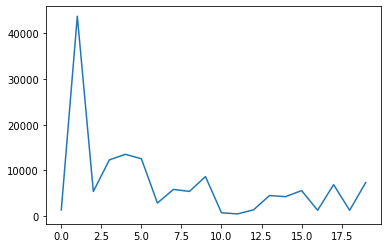

In [28]:
los_list = []
overall_loss = 0
torch.manual_seed(47)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(trainloader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        y_pred = model(inputs)
        l = loss(y_pred, labels)
        
        # Backward pass and optimize
        l.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        overall_loss += l.item()
        
        if (i+1) % 3 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Avg. Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, overall_loss / (i*batch_size)))
    
    if epoch%50== 0:
        los_list.append(l)
        
ep = np.arange(len(los_list))
plt.plot(ep,los_list)

In [29]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
loss_test = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        pred = model(inputs)
        lo = loss(pred, labels)
    print("\n In: %s \n targ: %s \n pred: %s " %(inputs, labels, pred))



 In: tensor([[0.0889]]) 
 targ: tensor([[134.9000]]) 
 pred: tensor([[80.5953]]) 
